## Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Chargement des données

In [24]:
df=pd.read_csv('social_media_vs_productivity.csv')
df.head(10)

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
5,38,Male,Finance,1.512568,Twitter,50,6.429312,NaN,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,0.000000,4.568728
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376
8,40,Female,Education,4.097401,Instagram,57,5.839590,3.219022,3.004240,4.0,NaN,0.000000,10,False,True,2,10,0.000000,1.960131
9,28,Other,IT,7.595577,Twitter,64,5.888936,NaN,NaN,3.0,6.761952,1.449841,10,False,False,1,18,6.959377,6.808102


## Comprendre la structure des données

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [9]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


## Approches statistiques: 
Pour les valeurs catégorielles, nous allons utiliser des graphiques à barres pour visualiser la distribution des différentes catégories. Pour les valeurs numériques, nous allons utiliser des histogrammes pour visualiser la distribution des données.

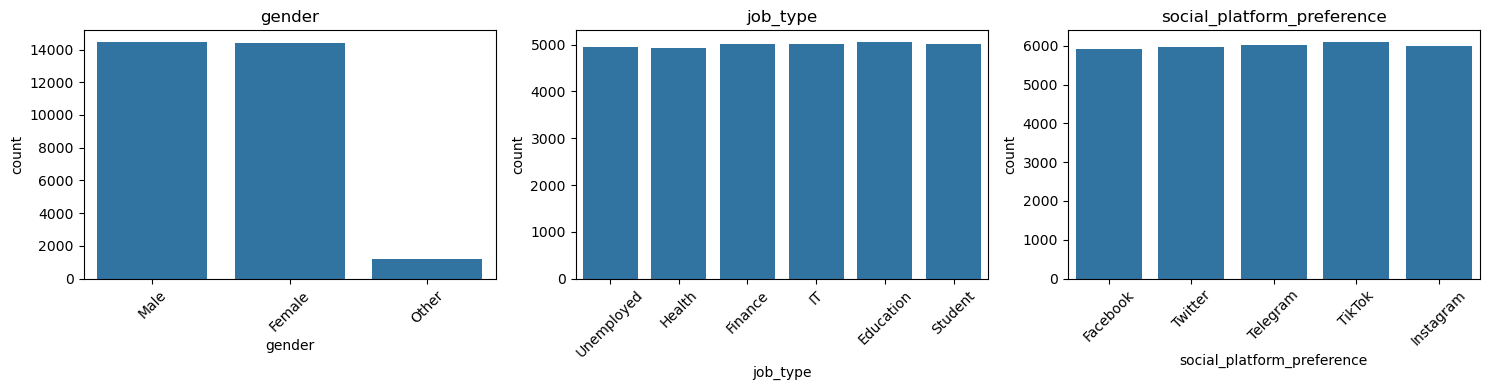

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
cols = ['gender', 'job_type', 'social_platform_preference']
for ax, col in zip(axes, cols):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

On peut remarquer que le dataset est assez équilibré sur la parité, le type de travail et le type de réseaux sociaux de référence des utilisateurs.

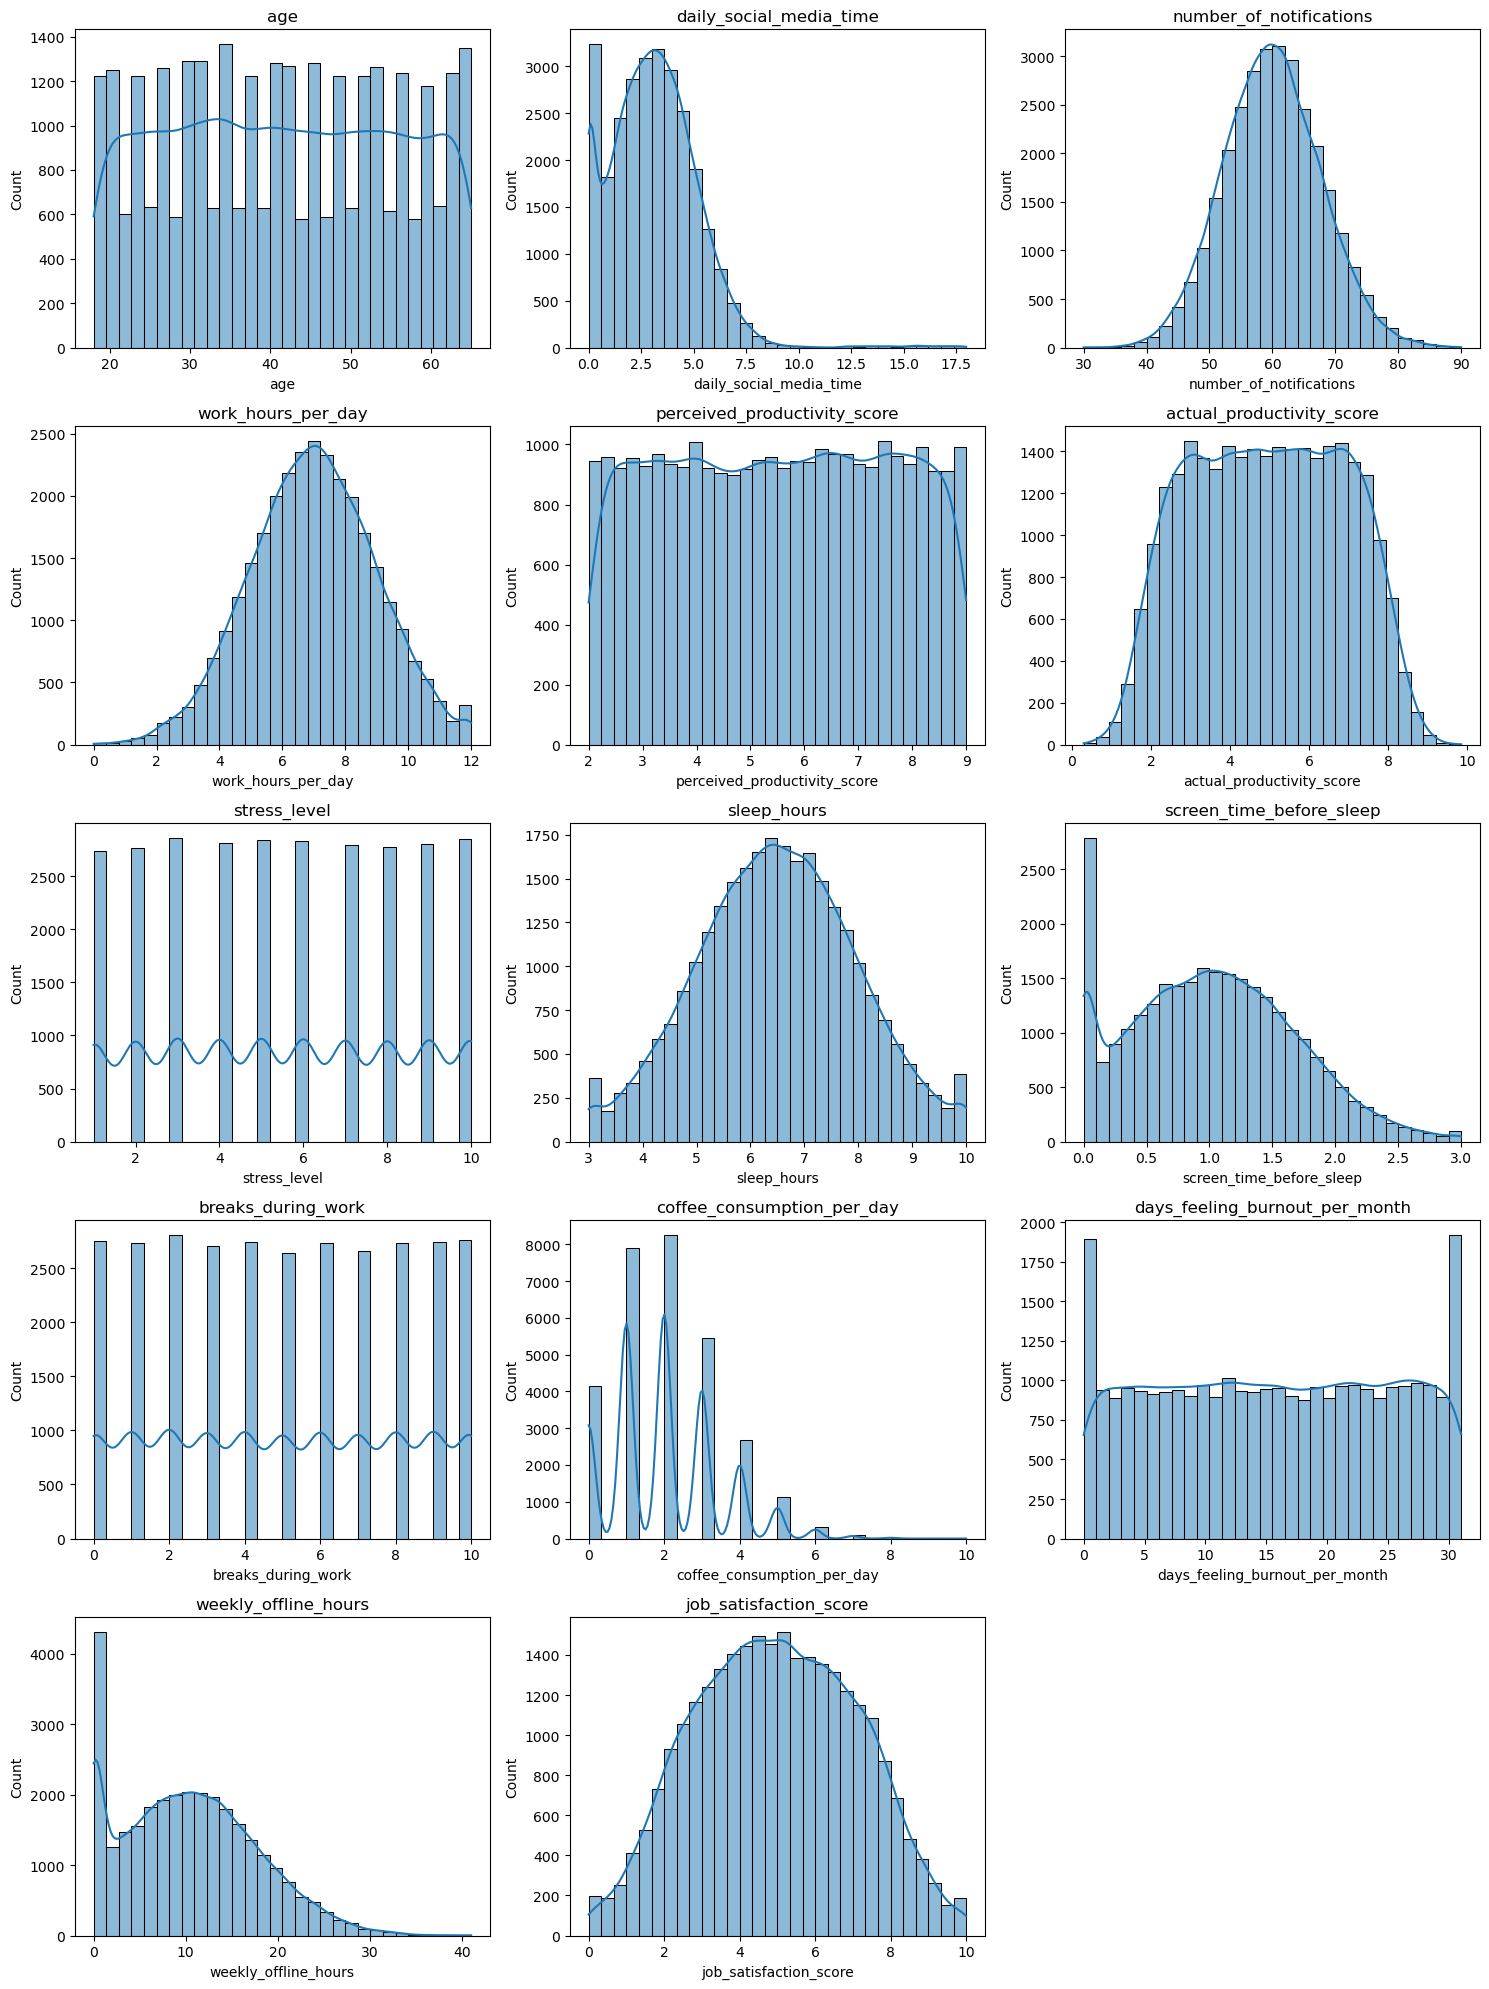

In [11]:
cols = ['age','daily_social_media_time','number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']
available = [c for c in cols if c in df.columns]
num_cols = df[available].select_dtypes(include=[np.number]).columns.tolist()

n = len(num_cols)
cols_per_row = 3
nrows = (n + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(nrows, cols_per_row, figsize=(cols_per_row*5, nrows*4))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
for ax, col in zip(axes, num_cols):
        sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, color='C0')
        ax.set_title(col)
for ax in axes[len(num_cols):]:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

## Détecter les doublons 

In [ ]:
df.duplicated().sum()

np.int64(0)

Aucun doublon détécté.

## Détecter les valeurs manquantes

In [7]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

## Détecter les valeurs aberrantes 

<Axes: xlabel='age'>

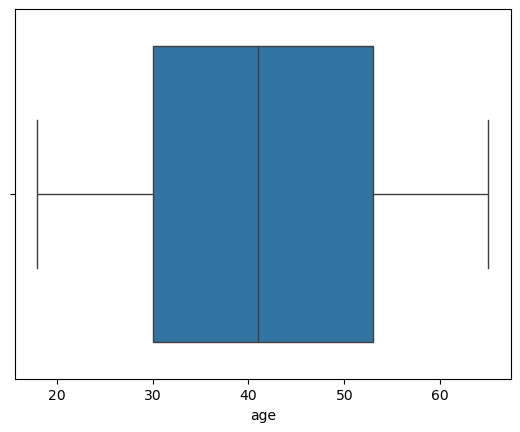

In [16]:
sns.boxplot(x="age", data=df)

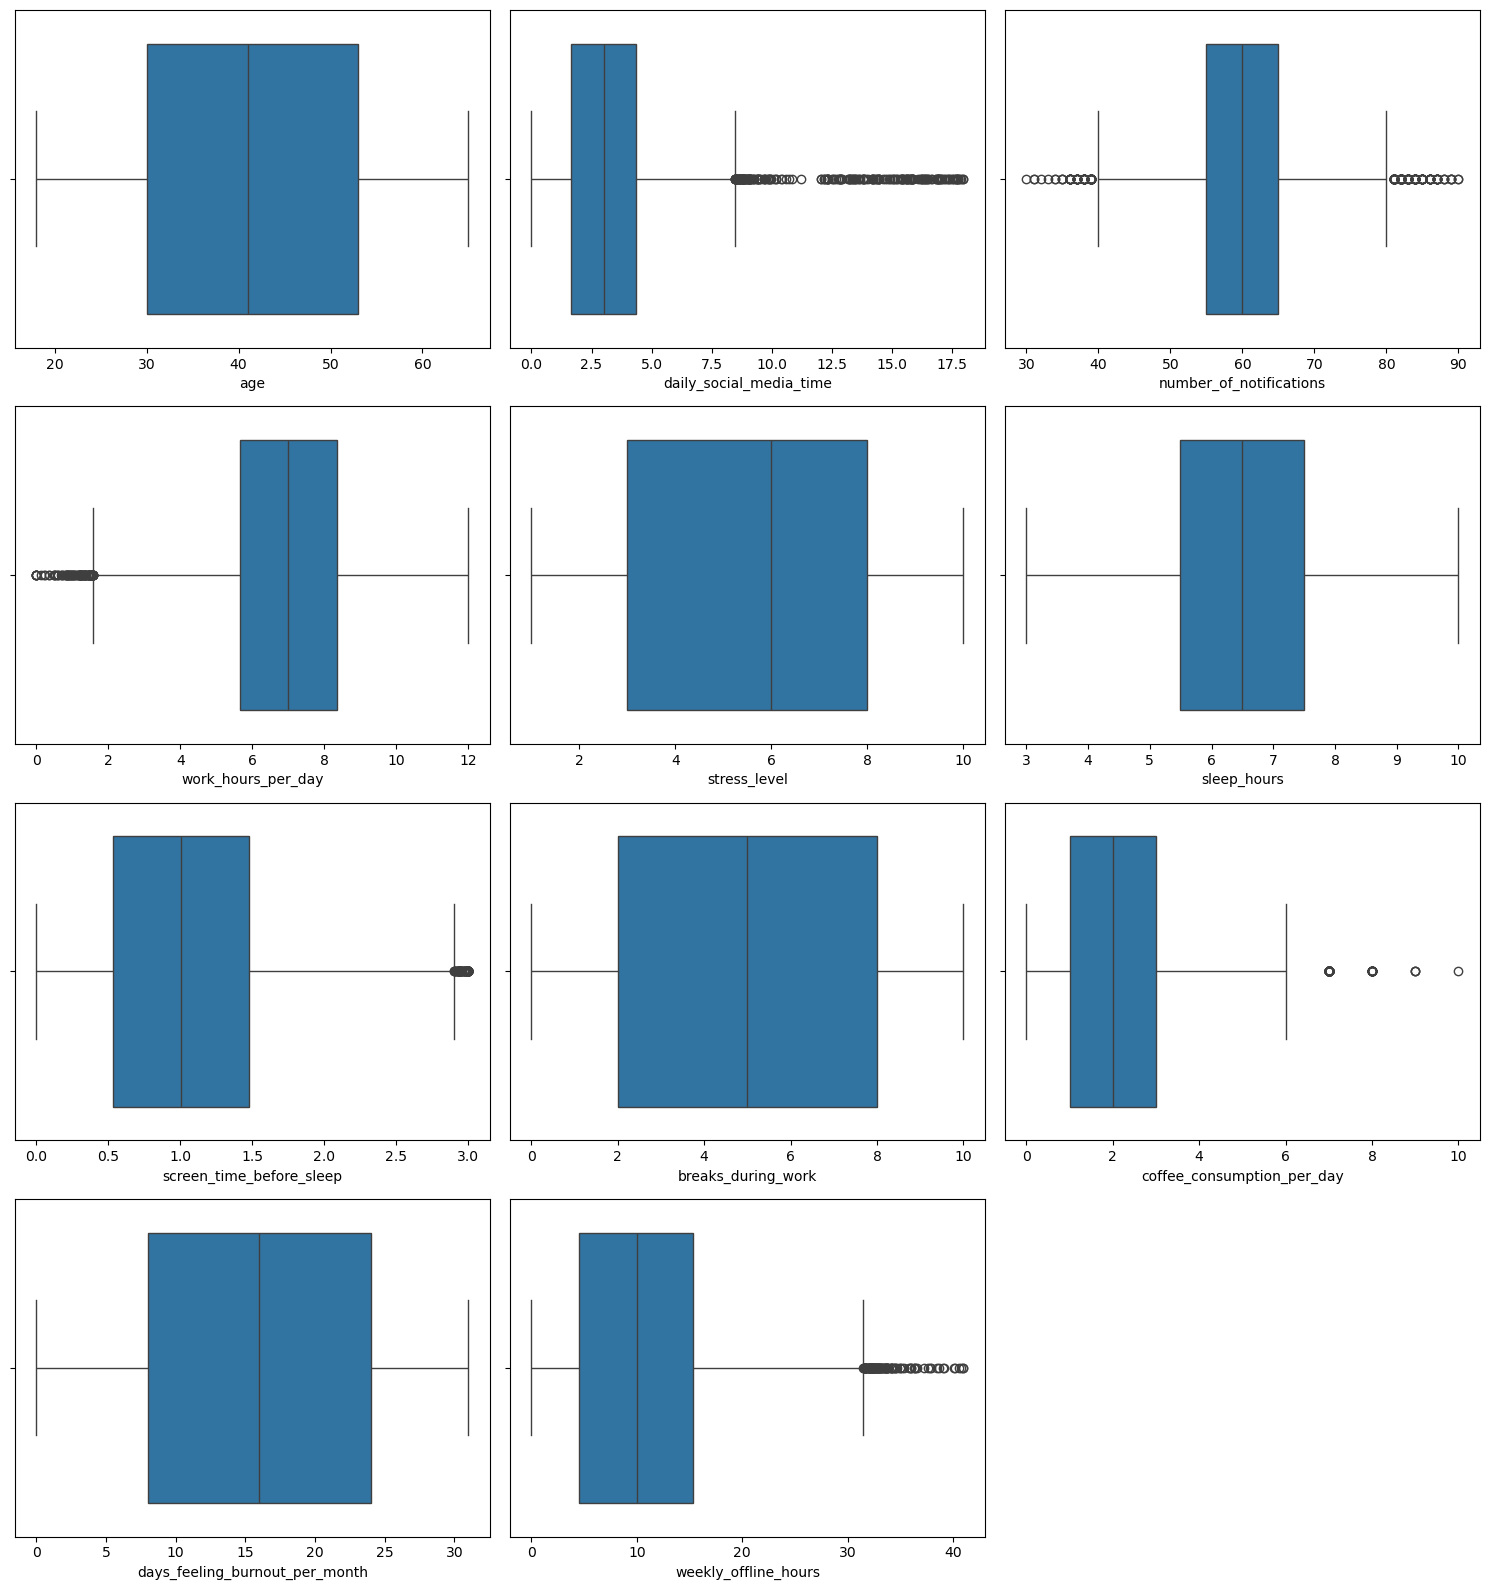

In [26]:
cols = ['age','daily_social_media_time','number_of_notifications', 'work_hours_per_day', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours']
available = [c for c in cols if c in df.columns]
num_cols = df[available].select_dtypes(include=[np.number]).columns.tolist()

n = len(num_cols)
cols_per_row = 3
nrows = (n + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(nrows, cols_per_row, figsize=(cols_per_row*5, max(1, nrows)*4))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
for ax, col in zip(axes, num_cols):
        sns.boxplot(x=df[col], ax=ax)
for ax in axes[len(num_cols):]:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

Données aberrantes: Un temps passé sur les réseaux sociaux supérieur à 15 heures. 
Outliers: moins de 2 heures de travail par jour, plus de 30 heures par jour déconnecté des réseaux sociaux en excluant le temps de sommeil. 
Ces données ne seront pas prises en compte pour notre étude car elles peuvent etre associées à un type de profil qui n'utilise pas les réseaux sociaux ou qui est au chomage.

## Vérifier le typage

In [22]:
df.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

## Gestion des valeurs aberrantes et des outliers

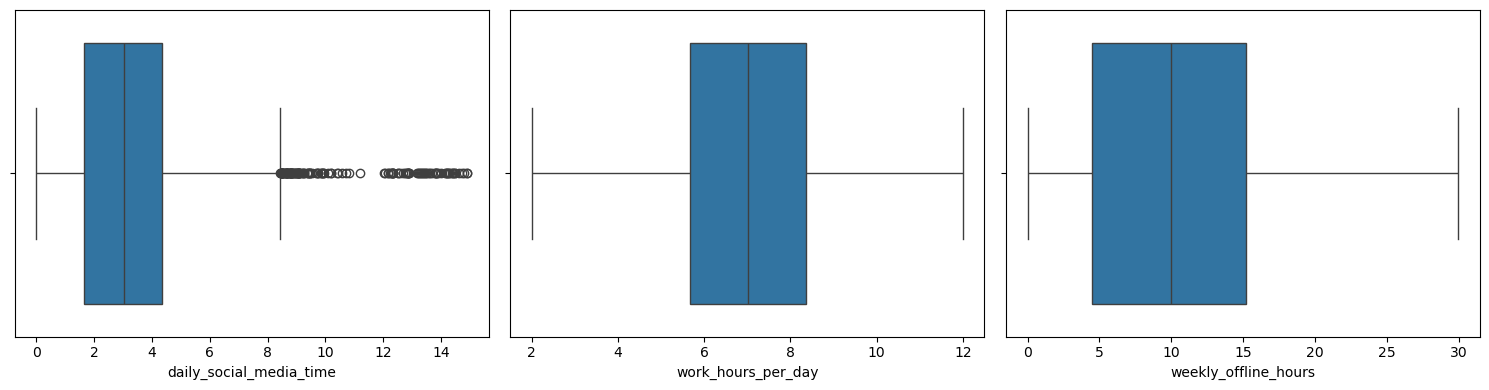

In [10]:
df = df.drop(df[df['daily_social_media_time']>15].index)
df=df.drop(df[df['work_hours_per_day']<2].index)
df=df.drop(df[df['weekly_offline_hours']>30].index)
cols = ['daily_social_media_time','work_hours_per_day','weekly_offline_hours']
available = [c for c in cols if c in df.columns]
num_cols = df[available].select_dtypes(include=[np.number]).columns.tolist()

n = len(num_cols)
cols_per_row = 3
nrows = (n + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(nrows, cols_per_row, figsize=(cols_per_row*5, max(1, nrows)*4))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
for ax, col in zip(axes, num_cols):
        sns.boxplot(x=df[col], ax=ax)
for ax in axes[len(num_cols):]:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

## Cas des valeurs manquantes

In [25]:
df['actual_productivity_score'].fillna(df['actual_productivity_score'].median(), inplace=True)
df['perceived_productivity_score'].fillna(df['perceived_productivity_score'].median(), inplace=True)
df['job_satisfaction_score'].fillna(df['job_satisfaction_score'].median(), inplace=True)
df['daily_social_media_time'].fillna(df['daily_social_media_time'].median(), inplace=True)
df['stress_level'].fillna(df['stress_level'].median(), inplace=True)
df['sleep_hours'].fillna(df['sleep_hours'].median(), inplace=True)
df['screen_time_before_sleep'].fillna(df['screen_time_before_sleep'].median(), inplace=True)

C:\Users\mrand\AppData\Local\Temp\ipykernel_9864\4271662592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['perceived_productivity_score'].fillna(df['perceived_productivity_score'].median(), inplace=True)
C:\Users\mrand\AppData\Local\Temp\ipykernel_9864\4271662592.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

## Matrice de correlation

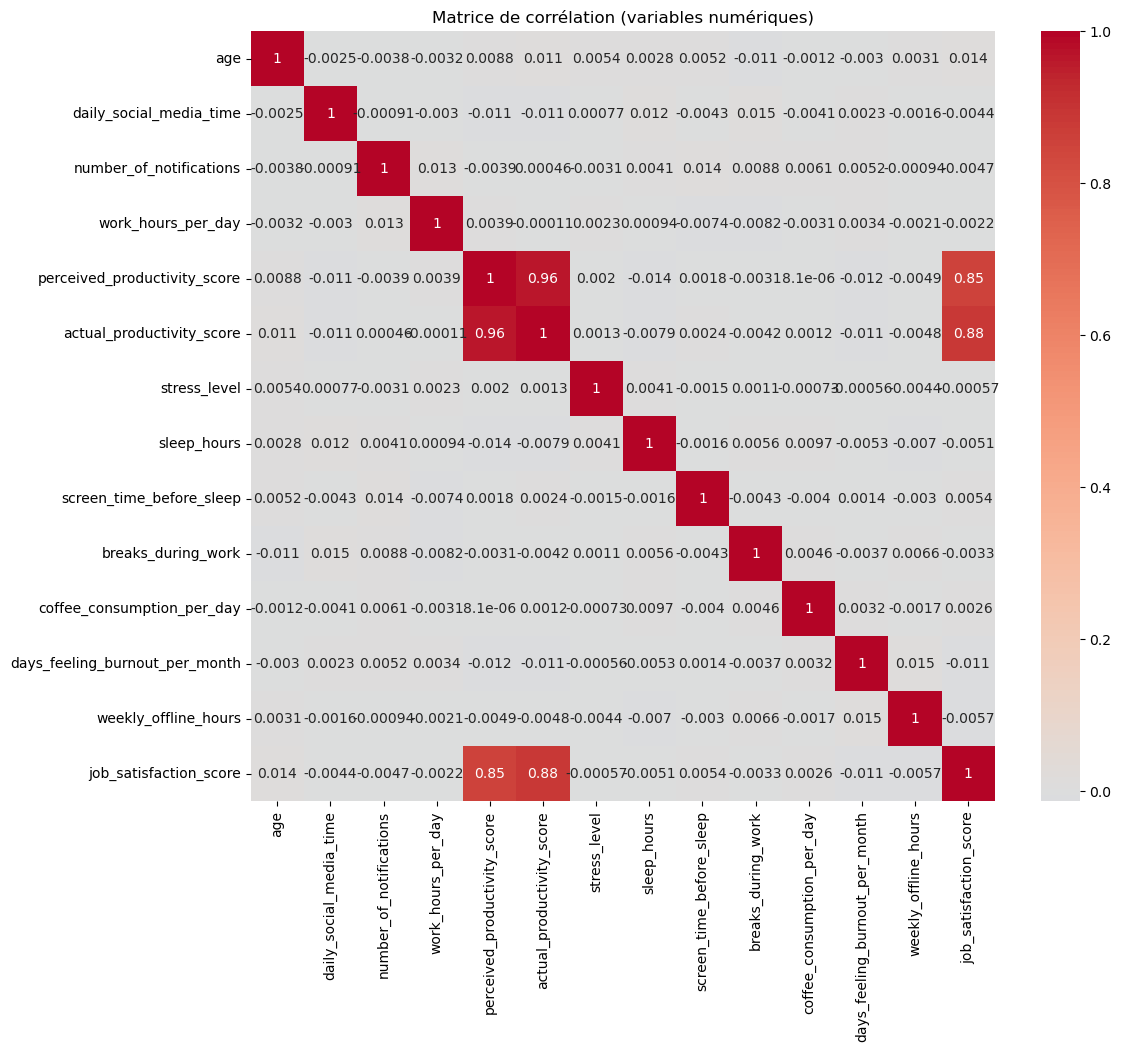

In [8]:
# Calcul et affichage de la matrice de corrélation
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation (variables numériques)')
plt.show()

La matrice de correlation permet de comparer les colonnes pour trouver celles dont les informations extraites peuvent avoir un lien. Celles qui ont une grande correlation sont la satisfaction au travail et la productivité.

## Preprocessing

On standardise l'age, les valeurs en heures et en jours pour qu'elles puissent etre exprimées dans un ordre de grandeur équivalent avec une moyenne ramenée à 0. 
Les valeurs discrètes sont 'number_of_notifications', 'days_feeling_burnout_per_month' et les valeurs continues sont 'daily_social_media_time', 'work_hours_per_day', 'sleep_hours', 'screen_time_before_sleep', 'weekly_offline_hours'.

Pour les valeurs catégorielles, on utilise un encodage en OneHotEncoding, comme ce sont des valeurs nominales et qu'elles ont chacune moins de 6 valeurs. Elles ne suscitent aucun ordre naturel.

In [25]:
num_features = ['job_satisfaction_score','perceived_productivity_score','age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'sleep_hours', 'screen_time_before_sleep', 'days_feeling_burnout_per_month', 'weekly_offline_hours']
cat_features = ['gender', 'job_type', 'social_platform_preference']

numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('cat_features', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_pipeline, num_features), ('cat', categorical_pipeline, cat_features)])

## RandomForest 
peut etre perfomant pour ce type de prédiction car la productivité n’évolue pas forcément de façon linéaire avec les variables(par exemple un salarié qui travaille plus d'heures peut etre moins productif qu'un autre qui travaille moins).

La colonne à prédire est le score de productivité réel(actual_productivity_score)

In [28]:
# Suppression des lignes où la cible est NaN
df_clean = df.dropna(subset=["actual_productivity_score"])

X = df_clean.drop("actual_productivity_score", axis=1)
y = df_clean["actual_productivity_score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

rf = RandomForestRegressor(
    max_depth=8,
    min_samples_leaf=3,
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf)
], verbose=True)

Comme hyperpamètres, nous avons choisi max_depth pour limiter la profondeur des arbres afin d'éviter le surapprentissage, min_sample_leaf pour limiter le nombre d'echantillon minimum de chaque feuille pour éviter les valeurs extremes, n_estimators pour définir le nombre d'arbres, random_state pour s'assurer que les arbres sont entrainés sur un echantillon aléatoire de données.

Les meilleures performances du modèle ont été atteintes avec ces valeurs d'hyperparamètres, une profondeur 8 des arbres pour des prévisions lissées et simples sans risque de surapprentissage, 3 pour les echantillons de chaque feuille pour généraliser le cas sans exclure trop de valeurs.

Afficher la pipeline

In [30]:
print(pipeline)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['job_satisfaction_score',
                                                   'perceived_productivity_score',
                                                   'age',
                                                   'daily_social_media_time',
                                                   'number_of_notifications',
                                                   'work_hours_per_day',
                                                   'sleep_hours',
                                                  

Nous avons choisi les métriques d'évaluation MAE, pour mesurer la valeur moyenne absolue d'erreur du modèle, RMSE pour détecter si le modèle fait de grosses erreurs et R2 pour comparer la performaance du modèle avec les autres.

In [31]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("MAE:", (mean_absolute_error(y_test, y_pred)))
print("RMSE:", (np.sqrt(mean_squared_error(y_test, y_pred))))
print("R2:", r2_score(y_test, y_pred))

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=  12.3s
MAE: 0.4907394282135513
RMSE: 0.6933236340604125
R2: 0.8517341918834629


Selon MAE, le modèle se trompe donc en moyenne de 0,49 sur ses prédictions. Comme le RMSE est assez différent de 0, le modèle a certaines limites, notamment pour éviter les grosses erreurs, par contre comme R2 est proche de 1 alors le modèle est assez performant dans la prédiction.

Importance des variables dans la prédiction

In [32]:
feature_names = pipeline.named_steps["preprocess"].get_feature_names_out()

rf_model = pipeline.named_steps["model"]

importances = rf_model.feature_importances_



importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(importance_df)

                                 feature  importance
1           perceived_productivity_score    0.934340
0                 job_satisfaction_score    0.051816
6                            sleep_hours    0.002057
5                     work_hours_per_day    0.001884
9                   weekly_offline_hours    0.001805
3                daily_social_media_time    0.001601
7               screen_time_before_sleep    0.001527
2                                    age    0.001412
4                number_of_notifications    0.001117
8         days_feeling_burnout_per_month    0.001003
21   social_platform_preference_Telegram    0.000141
12                          gender_Other    0.000128
11                           gender_Male    0.000118
20  social_platform_preference_Instagram    0.000118
13                    job_type_Education    0.000117
15                       job_type_Health    0.000109
19   social_platform_preference_Facebook    0.000106
16                           job_type_IT    0.

Cela est cohérent avec la matrice de correlation, avec l'auto-évaluation de la productivité par chaque salarié(perceived_productivity_score) qui est fortement correlée avec la colonne à deviner(le score de productivité réel) et le taux de satisfaction au travail (job_satisfaction_score) qui est la deuxième en terme de correlation. 

Arbre de décision pour la prédiction

In [ ]:
from sklearn.tree import export_text

feature_names = pipeline.named_steps["preprocess"].get_feature_names_out()
tree = pipeline.named_steps["model"].estimators_[0]

print(export_text(tree, feature_names=list(feature_names), max_depth=8))#car nous avons choisi 8 comme profondeur des arbres

|--- perceived_productivity_score <= -0.14
|   |--- perceived_productivity_score <= -0.99
|   |   |--- perceived_productivity_score <= -1.40
|   |   |   |--- job_satisfaction_score <= -1.20
|   |   |   |   |--- job_satisfaction_score <= -1.64
|   |   |   |   |   |--- job_satisfaction_score <= -2.34
|   |   |   |   |   |   |--- screen_time_before_sleep <= -1.58
|   |   |   |   |   |   |   |--- value: [3.04]
|   |   |   |   |   |   |--- screen_time_before_sleep >  -1.58
|   |   |   |   |   |   |   |--- perceived_productivity_score <= -1.63
|   |   |   |   |   |   |   |   |--- value: [1.45]
|   |   |   |   |   |   |   |--- perceived_productivity_score >  -1.63
|   |   |   |   |   |   |   |   |--- value: [1.89]
|   |   |   |   |   |--- job_satisfaction_score >  -2.34
|   |   |   |   |   |   |--- job_satisfaction_score <= -2.31
|   |   |   |   |   |   |   |--- perceived_productivity_score <= -1.75
|   |   |   |   |   |   |   |   |--- value: [4.95]
|   |   |   |   |   |   |   |--- perceived_

13-Modèle non supervisé: Kmeans peut etre un bon algorithme pour segmenter les profils 

Pour le processing, nous avons uniquement pris des variables numériques pour diminuer le calcul et ainsi améliorer les performances. 

C:\Users\mrand\AppData\Local\Temp\ipykernel_9864\3142218767.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['daily_social_media_time'].fillna(df['daily_social_media_time'].median(), inplace=True)
c:\Users\mrand\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to

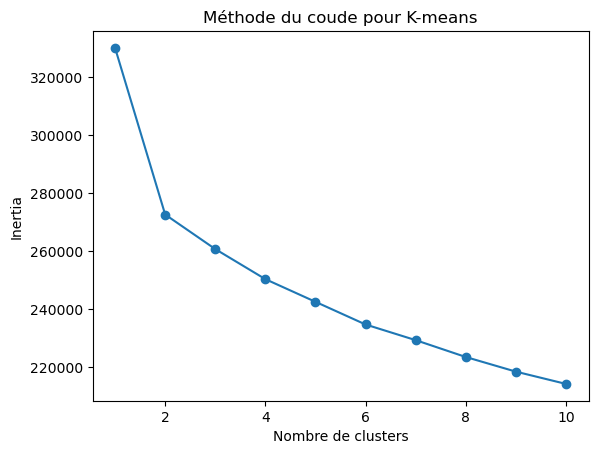

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df['daily_social_media_time'].fillna(df['daily_social_media_time'].median(), inplace=True)
num_features = ['actual_productivity_score','job_satisfaction_score','perceived_productivity_score','age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'sleep_hours', 'screen_time_before_sleep', 'days_feeling_burnout_per_month', 'weekly_offline_hours']

numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

#Déterminer le meilleur cluster
inertia = []
for k in range(1, 11):
    kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=k, random_state=42)) 
])
    kmeans_pipeline.fit(df)
    inertia.append(kmeans_pipeline.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour K-means')
plt.show()

On remarque que grace à la méthode du coude, il y a beaucoup de diminution entre 1 et 2. Cela signifie qu'augmenter le nombre de clusters de 1 à 2 améliore beaucoup la structure de la segmentation. Par contre, à partir de 3 jusqu'à 7, la diminution ralentit, cela signifie que l'augmentation de clusters ne modifie plus aussi nettement la structure de la segmentation. Après 7, la diminution est linéaire.  Donc, les nombres de 2 à 7 peuvent etre des bons candidats pour le nombre de clusters.

Pour confirmer le meilleur, on calcule le score de silhouette.

In [36]:
X_transformed = preprocessor.fit_transform(df)

best_score = -1
best_k = 0

for k in range(2, 7):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_transformed)
    
    score = silhouette_score(X_transformed, labels)
    
    print(f"k={k}, silhouette={score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"Meilleur nombre de clusters : {best_k}")
print(f"Meilleur silhouette score : {best_score:.4f}")

k=2, silhouette=0.1578
k=3, silhouette=0.0779
k=4, silhouette=0.0765
k=5, silhouette=0.0726
k=6, silhouette=0.0737
Meilleur nombre de clusters : 2
Meilleur silhouette score : 0.1578


Tous les clusters sont très faibles, cela veut dire qu'aucun nombre de cluster ne se démarque réellement. Mais le meilleur nombre de clusters est 2.

In [37]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_transformed)

df["cluster"] = labels
df["cluster"].value_counts()

cluster
1    15006
0    14994
Name: count, dtype: int64

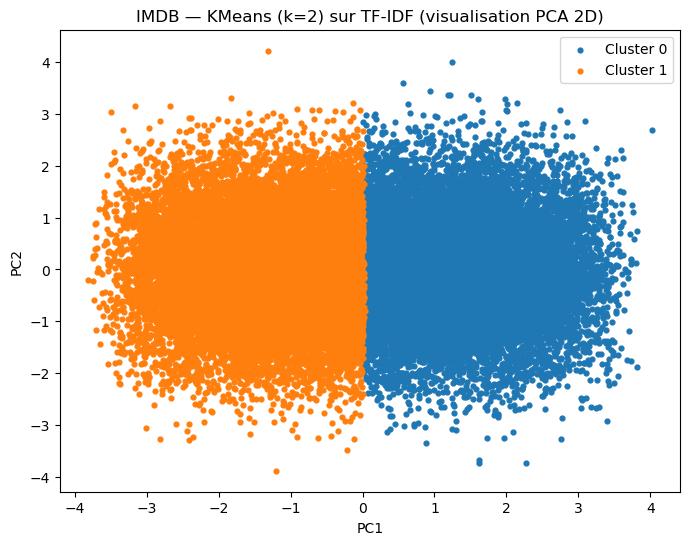

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_vis = pca.fit_transform(X_transformed)

plt.figure(figsize=(8,6))

mask0 = df["cluster"] == 0
mask1 = df["cluster"] == 1

plt.scatter(X_vis[mask0, 0], X_vis[mask0, 1], s=12, label="Cluster 0")
plt.scatter(X_vis[mask1, 0], X_vis[mask1, 1], s=12, label="Cluster 1")

plt.title("IMDB — KMeans (k=2) sur TF-IDF (visualisation PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

On remarque une distribution équilibrée des profils entre les 2 clusters selon sur l'axe de PC1. Donc il n'y a qu'un facteur de segmentation.

In [40]:
cols = ['actual_productivity_score','job_satisfaction_score','perceived_productivity_score','age', 
        'daily_social_media_time','number_of_notifications','work_hours_per_day',
        'sleep_hours','screen_time_before_sleep','days_feeling_burnout_per_month',
        'weekly_offline_hours']

# Moyennes pour chaque cluster
cluster_means = df.groupby('cluster')[cols].mean()
print(cluster_means)

         actual_productivity_score  job_satisfaction_score  \
cluster                                                      
0                         6.420230                6.491174   
1                         3.484544                3.437329   

         perceived_productivity_score        age  daily_social_media_time  \
cluster                                                                     
0                            7.141005  41.540483                 3.074164   
1                            3.882836  41.433293                 3.136517   

         number_of_notifications  work_hours_per_day  sleep_hours  \
cluster                                                             
0                      59.926971            6.980416     6.482567   
1                      59.990537            7.001161     6.517584   

         screen_time_before_sleep  days_feeling_burnout_per_month  \
cluster                                                             
0                        1.

Nous regardons la moyenne des variables pour déterminer le facteur de segmentation PC1. On remarque que la productivité réelle, le sentiment de productivité et la satisfaction au travail ont une répartition désequilibrée pour les 2 clusters au contraire des autres variables. De plus, les valeurs de la productivité réelle et de la satisfaction au travail sont les valeurs les plus proches pour les 2 clusters.
Interprétation:
Cluster 0 est beaucoup plus satisfait de son travail. Cluster 0 se perçoit comme beaucoup plus productif. Cluster 0 est réellement plus productif également. Au sujet des autres variables, les deux clusters n'ont pas beaucoup de différence et sont assez équilibrés. Ainsi les attributs qui peuvent segmenter les profils sont les facteurs productivité/satisfaction, car selon l'observation, ceux qui sont les plus satisfaits sont les plus productifs au travail et ceux qui sont les moins satisfaits sont les moins productifs. Cela explique pourquoi le score de productivité reélle en moyenne est assez proche de celui de la satisfaction au travail. Cela explique également pourquoi la productivité réelle dans le ML supervisé depend surtout de la perception personnelle et de la satisfaction au travail.

## Gradient Boosting Regressor

Nous avons choisi le Gradient Boosting plutôt que la régression linéaire car la productivité ne suit pas une relation linéaire avec les variables. Le Gradient Boosting prend en compte ces relations non-linéaires et interactions entre variables, ce qu'une régression linéaire ne peut pas faire.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_samples_leaf=3,
    subsample=0.8,
    random_state=42
)

gbr_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", gbr_model)
], verbose=True)

Comme hyperparamètres, nous avons choisi : **n_estimators** pour le nombre d'arbres séquentiels, **learning_rate** pour pondérer la contribution de chaque arbre (plus faible = plus robuste), **max_depth** pour limiter la complexité de chaque arbre, **min_samples_leaf** pour éviter les feuilles trop spécialisées, et **subsample** pour réduire le surapprentissage.

In [20]:
print(gbr_pipeline)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['job_satisfaction_score',
                                                   'perceived_productivity_score',
                                                   'age',
                                                   'daily_social_media_time',
                                                   'number_of_notifications',
                                                   'work_hours_per_day',
                                                   'sleep_hours',
                                                  

Nous utilisons les mêmes métriques que pour RandomForest MAE, RMSE, R2 afin de pouvoir comparer objectivement les deux modèles sur les mêmes données de test.

In [29]:
gbr_pipeline.fit(X_train, y_train)

y_pred_gbr = gbr_pipeline.predict(X_test)

print("MAE:",  mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R2:",   r2_score(y_test, y_pred_gbr))

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=  11.5s
MAE: 0.3937565382901436
RMSE: 0.51468584293222
R2: 0.9263230309269024


Le Gradient Boosting obtient de meilleures performances que le Random Forest: 
- MAE: 0.49 --> 0.39
- RMSE: 0.69 --> 0.51
- R2: 0.85 --> 0.93

Selon le MAE, le modèle se trompe en moyenne de seulement 0.39 sur ses prédictions, ce qui est une bonne amélioration. Le RMSE plus faible indique que le modèle gère mieux les cas extrêmes. Avec un R2 de 0.93, le Gradient Boosting explique 93% de la variance de la productivité réelle, ce qui en fait le modèle le plus performant pour l'instant

C:\Users\rayya\AppData\Local\Temp\ipykernel_20684\1746161950.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df_gbr.head(10), x="importance", y="feature", palette="viridis")


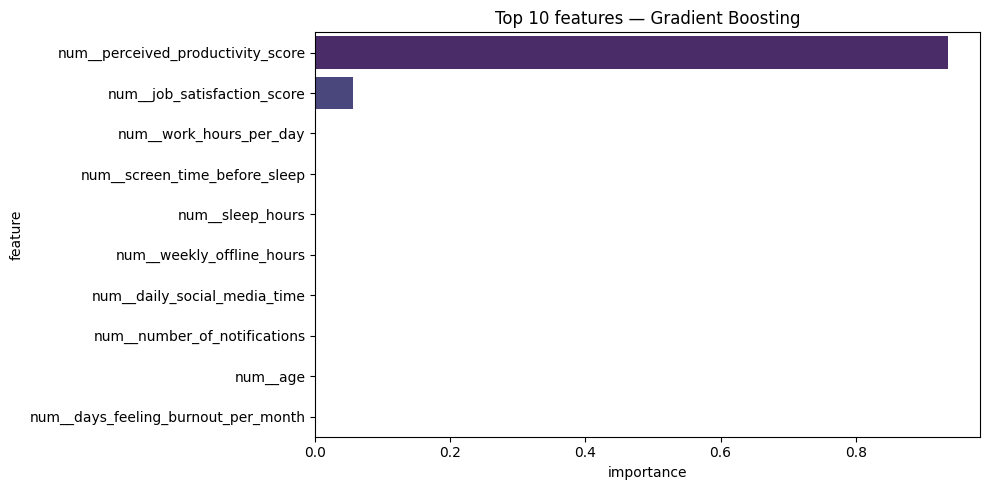

In [30]:
feat_names_gbr = gbr_pipeline.named_steps["preprocess"].get_feature_names_out()
importances_gbr = gbr_pipeline.named_steps["model"].feature_importances_

feat_df_gbr = pd.DataFrame({"feature": feat_names_gbr, "importance": importances_gbr})
feat_df_gbr = feat_df_gbr.sort_values("importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feat_df_gbr.head(10), x="importance", y="feature", palette="viridis")
plt.title("Top 10 features — Gradient Boosting")
plt.tight_layout()
plt.show()

Malgre une meilleure precision, on arrive a la meme conclustion que le rRandom Forest sur l'importance des variables, c'est vien le duo perception de soi/satisfaction au travail qui determine la productivite reelle et non les habitudes numeriques

## Support Vector Regression
Grâce à sa marge de tolérance (parametre epsilon), le modèle évite d'overfitter sur le bruit et ignore les petites variations. En y couplant un noyau RBF, on arrive à bien capter la non-linéarité complexe de nos données.

In [31]:
from sklearn.svm import SVR

svr_model = SVR(
    kernel='rbf',
    C=10,
    epsilon=0.1,
    gamma='scale'
)

svr_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", svr_model)
], verbose=True)

Comme hyperparamètres, nous avons choisi : **kernel='rbf'** pour capturer les relations non-linéaires via la fonction de base radiale, **C=10** qui contrôle la tolérance aux erreurs, **epsilon=0.1** qui définit la marge d'insensibilité autour des prédictions, et **gamma='scale'** pour adapter automatiquement la portée du kernel à l'échelle des données.

C=10 offre un bon équilibre entre flexibilité et régularisation pour des données comportementales. Le kernel RBF est préféré au kernel linéaire car, comme observé avec les modèles précédents, la productivité n'évolue pas linéairement avec les variables

In [32]:
print(svr_pipeline)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['job_satisfaction_score',
                                                   'perceived_productivity_score',
                                                   'age',
                                                   'daily_social_media_time',
                                                   'number_of_notifications',
                                                   'work_hours_per_day',
                                                   'sleep_hours',
                                                  

Nous utilisons les mêmes métriques MAE, RMSE et R2 pour permettre une comparaison directe avec RandomForest et Gradient Boosting. Le SVR est robuste aux valeurs aberrantes, ce qui peut etre avantagant ici

In [33]:
svr_pipeline.fit(X_train, y_train)

y_pred_svr = svr_pipeline.predict(X_test)

print("MAE:",  mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R2:",   r2_score(y_test, y_pred_svr))

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total= 3.3min
MAE: 0.4765347527066421
RMSE: 0.6282113196307968
R2: 0.8902362789258526


Le SVR obtient un R2 de 0.89, ce qui est correct mais inférieur au Gradient Boosting 0.93 et légèrement supérieur au Random Forest 0.85. Le MAE de 0.476 est meilleur que le RF mais moins bon que le GBR, ce qui place le SVR en position intermédiaire entre les deux.

le SVR avec kernel RBF capture bien la non-linéarité des données, mais les interactions complexes entre variables sont mieux modélisées par les arbres séquentiels du Gradient Boosting. De plus, les 3 minutes d'entraînement confirment le coût computationnel élevé du SVR pour un gain de performance qui ne justifie pas l'attente par rapport au Gradient Boosting

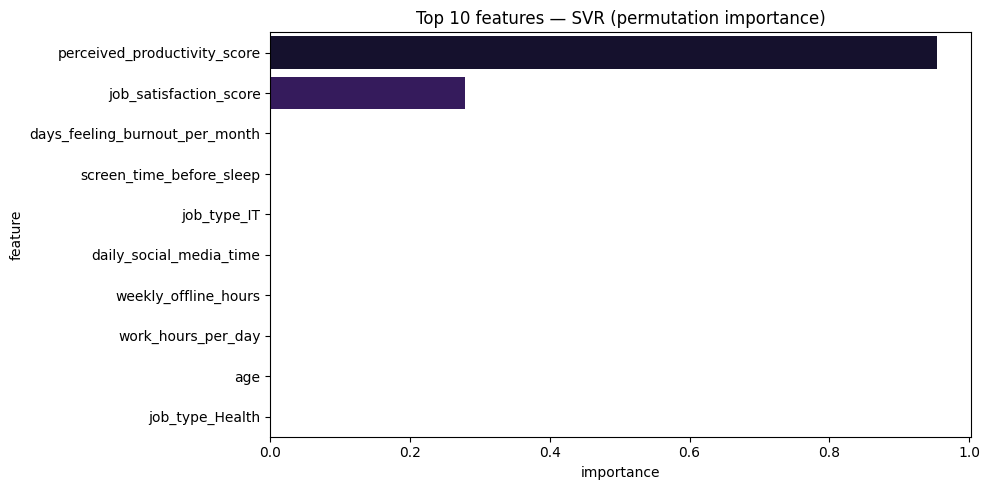

In [35]:
feat_names_svr = svr_pipeline.named_steps["preprocess"].get_feature_names_out()


# On calcule une importance approximative via permutation importance
from sklearn.inspection import permutation_importance

X_test_transformed = svr_pipeline.named_steps["preprocess"].transform(X_test)

perm = permutation_importance(
    svr_pipeline.named_steps["model"],
    X_test_transformed,
    y_test,
    n_repeats=5, # c'etait 10 mais c'est long à calculer, on peut réduire a 5 pour une estimation plus rapide
    random_state=42
)

perm_df = pd.DataFrame({"feature": feat_names_svr, "importance": perm.importances_mean})
perm_df = perm_df.sort_values("importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=perm_df.head(10), x="importance", y="feature", hue="feature", palette="magma", legend=False)
plt.title("Top 10 features — SVR (permutation importance)")
plt.tight_layout()
plt.show()

Le SVR confirme la même tendance que les deux modèles précédents : perceived_productivity_score domine largement ~0.95, suivi de job_satisfaction_score ~0.28. La différence notable par rapport au GBR est que le SVR accorde une importance légèrement plus visible à job_satisfaction_score, ce qui suggère que le SVR capte davantage la contribution de la satisfaction au travail. Les autres variables restent négligeables, ce qui renforce la conclusion globale : quelle que soit l'approche algorithmique utilisée, c'est bien la perception de soi et la satisfaction au travail qui prédisent la productivité réelle

## Classement final des 3 modèles :
### Gradient Boosting (R2: 0.93) > SVR (R2: 0.89) > Random Forest (R2: 0.85)